<a href="https://colab.research.google.com/github/adityaverma03/Index-Crimes-by-County-and-Agency/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               23143 non-null  object 
 1   Agency               23143 non-null  object 
 2   Year                 23143 non-null  int64  
 3   Months Reported      13459 non-null  float64
 4   Index Total          23143 non-null  int64  
 5   Violent Total        23143 non-null  int64  
 6   Murder               23143 non-null  int64  
 7   Rape                 23143 non-null  int64  
 8   Robbery              23143 non-null  int64  
 9   Aggravated Assault   23143 non-null  int64  
 10  Property Total       23143 non-null  int64  
 11  Burglary             23143 non-null  int64  
 12  Larceny              23143 non-null  int64  
 13  Motor Vehicle Theft  23143 non-null  int64  
 14  Region               23143 non-null  object 
dtypes: float64(1),

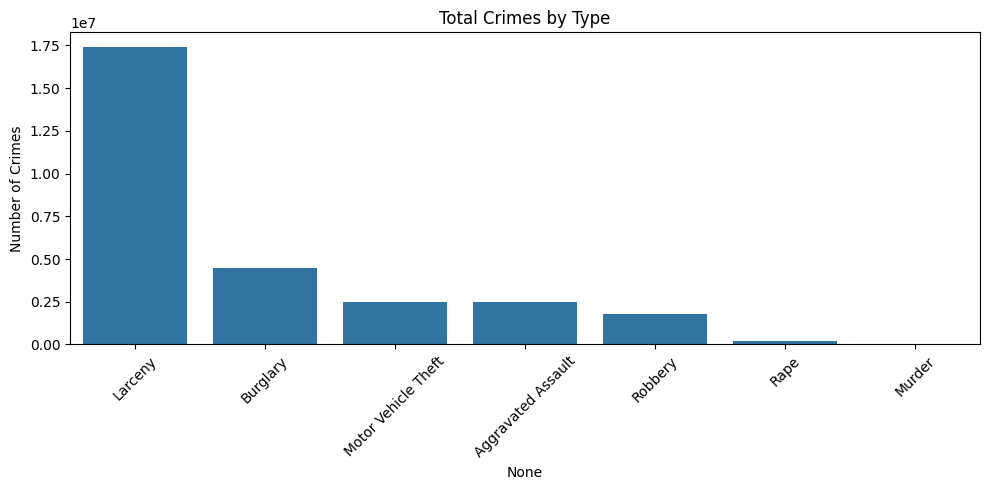

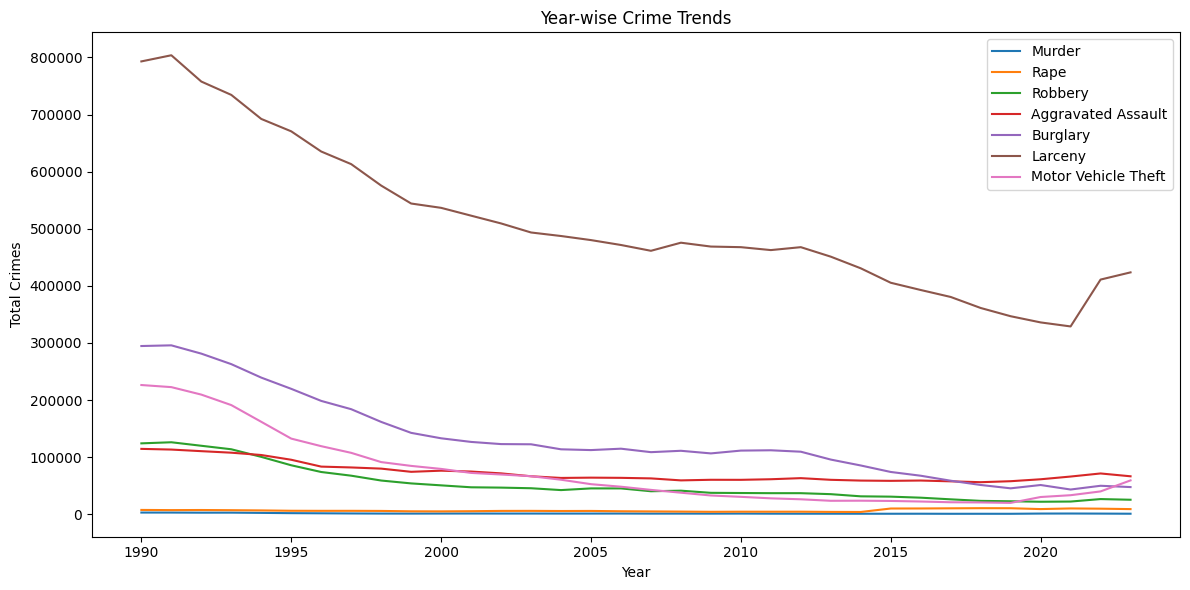

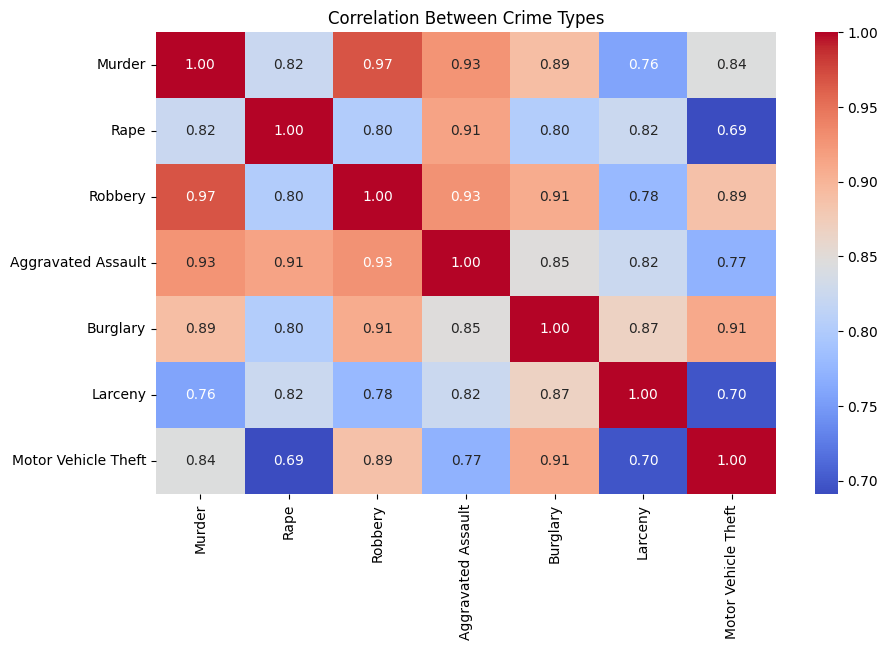

<ipython-input-22-0b7cf2710555>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_crime.values, y=county_crime.index, palette='Reds_r')


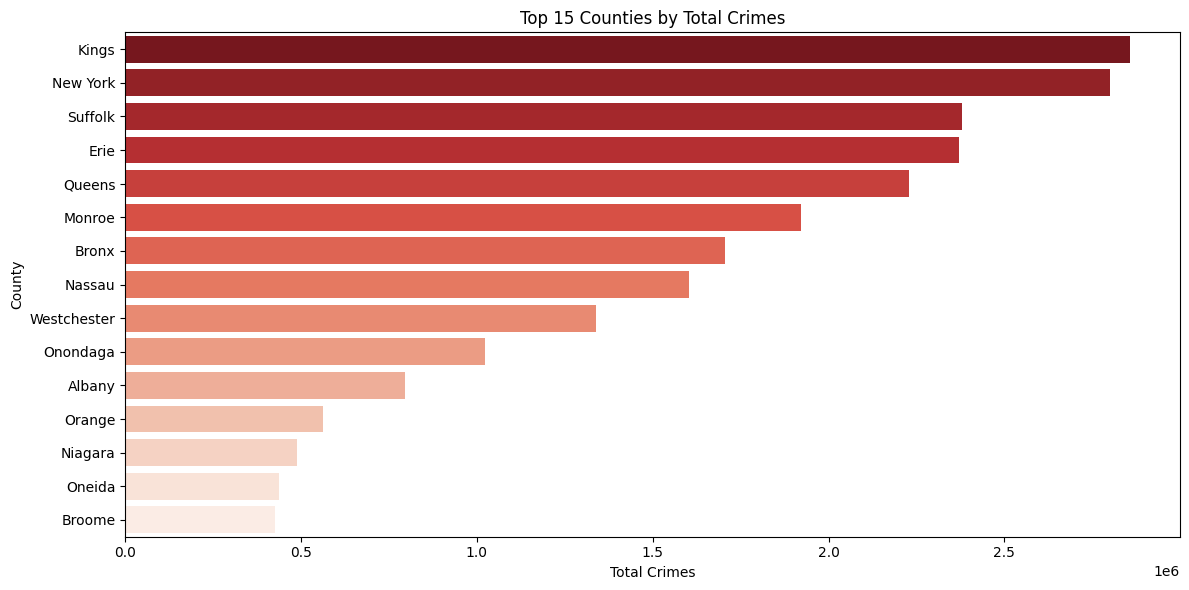

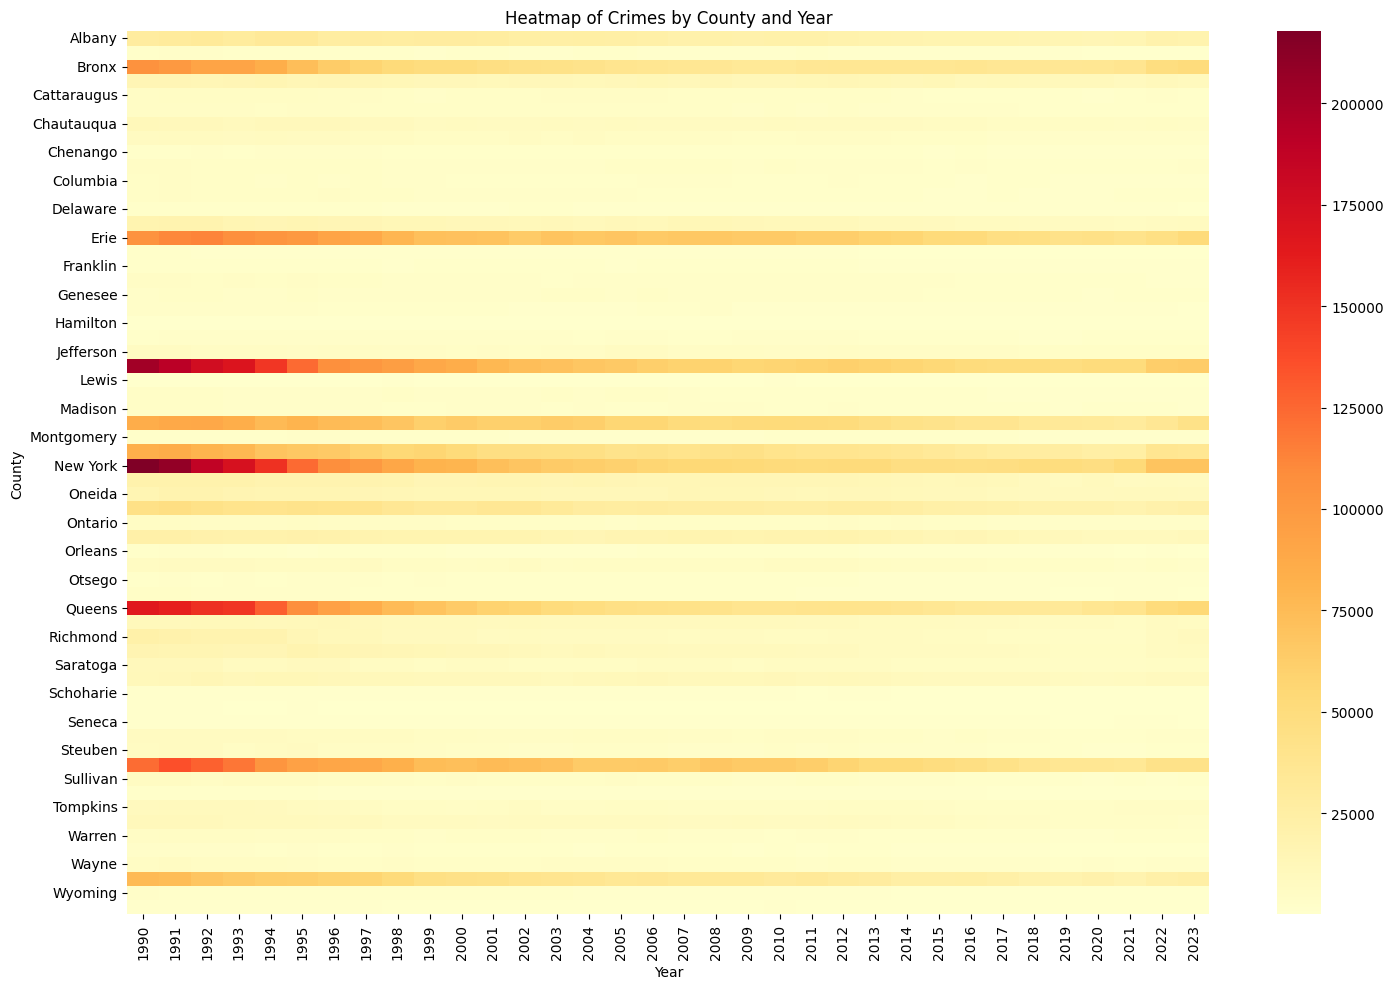

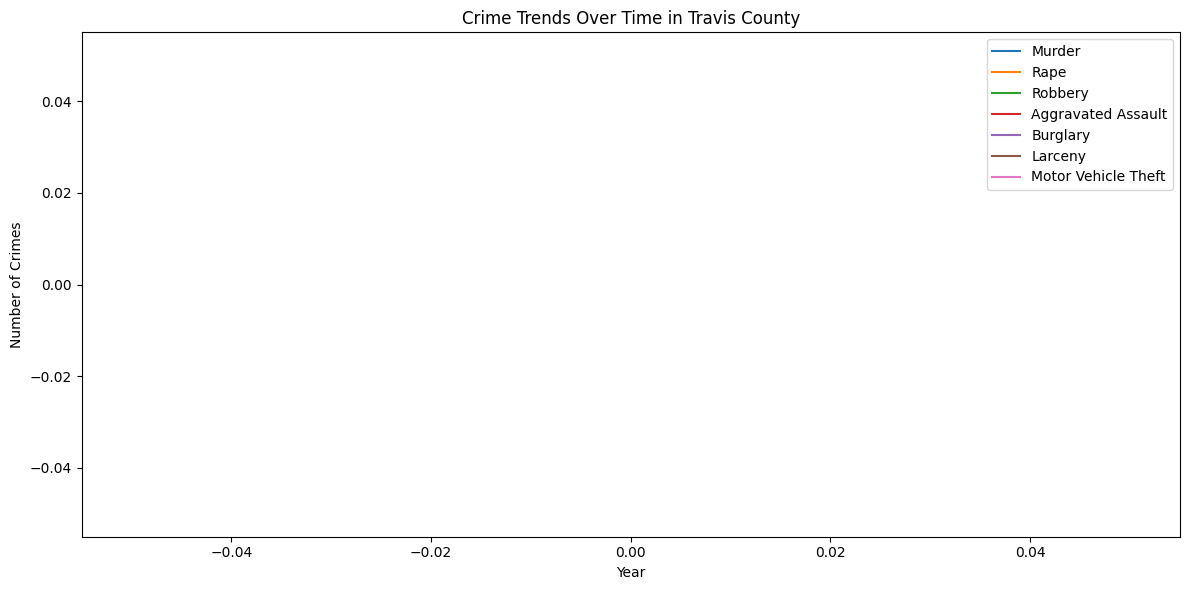

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/Index_Crimes_by_County_and_Agency__Beginning_1990.xlsx")




# Display basic info
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
# Example: Fill missing numerical values with 0, categorical with mode
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = df[numeric_cols].fillna(0)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert date columns to datetime
if 'Year' in df.columns:
    df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

# Standardize text data
df['County'] = df['County'].str.title().str.strip()
df['Agency'] = df['Agency'].str.title().str.strip()

# Save cleaned data
df.to_csv('cleaned_index_crimes.csv', index=False)
print(" Data cleaned and saved.")

# Reload the cleaned data
df = pd.read_csv('cleaned_index_crimes.csv')

# Summary statistics
print(df.describe())

# Distribution of crime types (example: 'Burglary', 'Aggravated Assault', etc.)
crime_types = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']

# Check total crimes by type
total_crimes_by_type = df[crime_types].sum().sort_values(ascending=False)
print("\nTotal Crimes by Type:\n", total_crimes_by_type)

# Barplot for total crimes
plt.figure(figsize=(10, 5))
sns.barplot(x=total_crimes_by_type.index, y=total_crimes_by_type.values)
plt.title("Total Crimes by Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Year-wise trend
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
yearly_trends = df.groupby('Year')[crime_types].sum()

plt.figure(figsize=(12, 6))
for crime in crime_types:
    sns.lineplot(data=yearly_trends, x=yearly_trends.index, y=crime, label=crime)
plt.title("Year-wise Crime Trends")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[crime_types].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Crime Types")
plt.show()

# Total crimes by county
df['Total_Crimes'] = df[crime_types].sum(axis=1)
county_crime = df.groupby('County')['Total_Crimes'].sum().sort_values(ascending=False).head(15)

# Barplot: Top 15 counties
plt.figure(figsize=(12, 6))
sns.barplot(x=county_crime.values, y=county_crime.index, palette='Reds_r')
plt.title("Top 15 Counties by Total Crimes")
plt.xlabel("Total Crimes")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# Heatmap: Crime distribution by county and year
pivot = df.pivot_table(index='County', columns='Year', values='Total_Crimes', aggfunc='sum').fillna(0)

plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Heatmap of Crimes by County and Year")
plt.xlabel("Year")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# Time series for a specific county
county_name = 'Travis'  # Example county
county_trend = df[df['County'] == county_name].groupby('Year')[crime_types].sum()

plt.figure(figsize=(12, 6))
for crime in crime_types:
    plt.plot(county_trend.index, county_trend[crime], label=crime)
plt.title(f"Crime Trends Over Time in {county_name} County")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.tight_layout()
plt.show()
